#Name: Kunal Darwesh
Aim: To Predict the percentage of an student based on the no. of study hours.

# Importing the required libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading dataset from remote link

In [17]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(url)
print("Data imported successfully")

dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploring the dataset

In [18]:
dataset.shape

(25, 2)

In [19]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
# Checking the data for any null values and cleaning it, if null values are found.
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

#Preparing the data

In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# Training the Simple Linear Regression model on the Training set

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing Actual vs Predicted

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
from sklearn import metrics  
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2 Score :', metrics.r2_score(y_test, y_pred))

Mean Absolute Error : 4.183859899002982
Mean Squared Error : 21.598769307217456
Root Mean Squared Error : 4.647447612100373
R-2 Score : 0.9454906892105354


# Visualising the Training set results

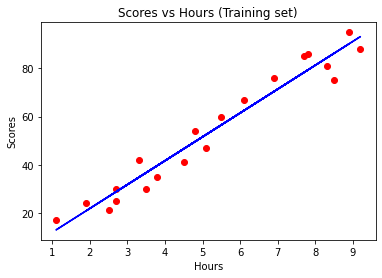

In [27]:

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Scores vs Hours (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


# Visualising the Test set results

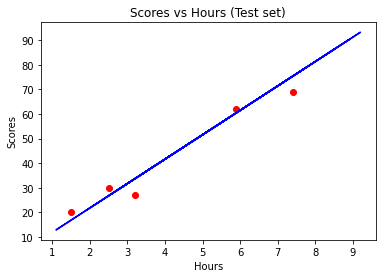

In [28]:

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Scores vs Hours (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

What will be predicted score if a student studies for 9.25 hrs/ day?
Testing with new data

In [29]:
hours = 9.25
test= np.array([hours])
test= test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
